In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv('/kaggle/input/faang-stocks-covid190101202004012022/faang_stocks_pandemic_data.csv')

데이터 셋 정보 확인

In [ ]:
data.info()

결측치 확인

In [ ]:
data.isnull().sum()

총 5개 회사의 주식 관련 데이터가 있음을 알 수 있다.

In [ ]:
data['Name'].unique()

In [ ]:
data = data.drop('Unnamed: 0', axis = 1)

In [ ]:
data['Date']=pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [ ]:
data = data.sort_values(by=['Name'])

In [ ]:
data['Name'].value_counts()

In [ ]:
amazon = data.iloc[0:568]
apple = data.iloc[569:1136]
facebook = data.iloc[1137:1704]
google = data.iloc[1705:2272]
netflix = data.iloc[2273:]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 페이스북 시각화

In [ ]:
facebook = facebook.sort_values(by=['Date'],ascending=True)
facebook.head()

거래량 기준으로 시각화
: 거래량은 최근에 가장 많이 일어남을 알 수 있다.


코로나 종식 분위기의 영향이 있을 것으로 생각

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=facebook['Volume'], x=facebook['Date'])
plt.xlabel('time')
plt.ylabel('price')

종가 기준으로 시각화 : 페이스북의 주식 가격은 2020년 3월 코로나19의 유행 이후 계속 증가하다가 최근에 가장 하락세를 보임을 확인할 수 있다.




Q. 페이스북의 주식은 어떻게 될까?


Q. 페이스북의 주식이 큰폭으로 떨어지던 시기에는 무슨일이 있던 것일까?


등을 생각해볼 수 있음

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=facebook['Close'], x=facebook['Date'])
plt.xlabel('time')
plt.ylabel('price')

이동평균선 계산


x-N일부터 x일 까지의 평균을 "x일의 N일 이동평균선이라고 한다" 이동평균선은 주식값 예측에 중요한 역할을 한다고 한다. 

단기이동평균선이 장기이동평균선을 넘으면 "골든크로스"라고 한다 (=> 최근 주식값이 예전꺼보다 높다 -> 주식이 오르고 있다)

반대로 장기이동평균선이 단기이동평균선을 넘으면 "데드크로스"라고 한다 (=> 최근 주식값이 예전꺼보다 낮다 -> 주식이 떨이지고 있다)

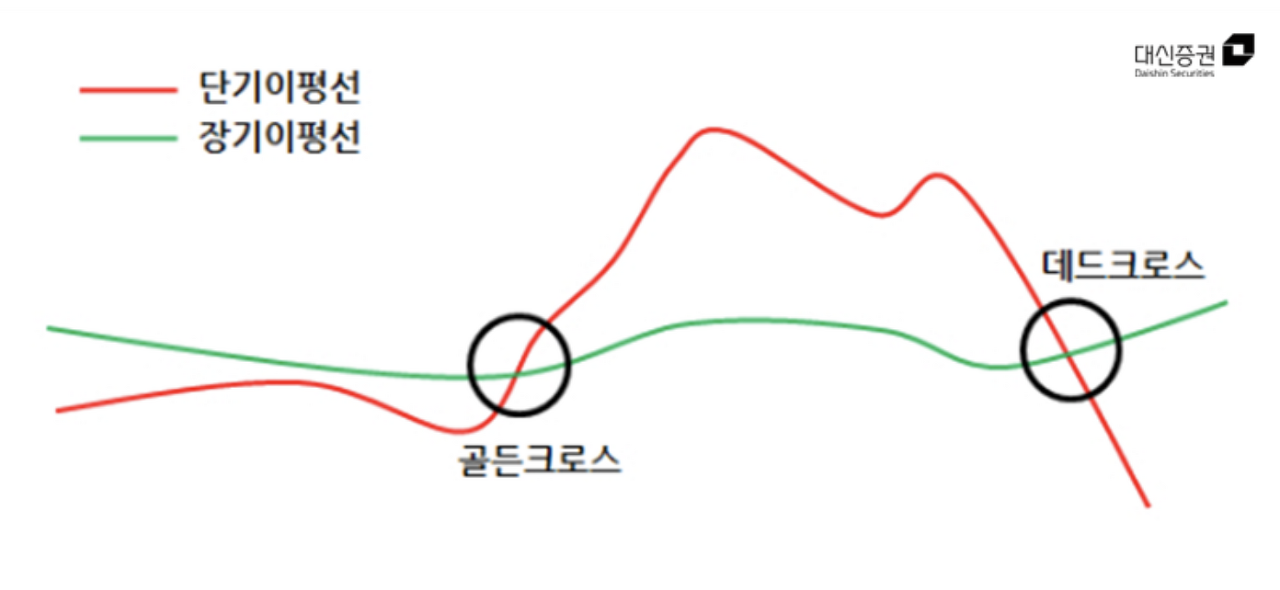

**종가를 이용한 이동평균선 계산, 추가**

In [ ]:
fb=facebook
fb.head()

In [ ]:
# maN : N일전부터 현재까지의 수정종가 평균
ma5 = fb['Adj Close'].rolling(window=5).mean()
ma20 = fb['Adj Close'].rolling(window=20).mean()
ma60 = fb['Adj Close'].rolling(window=60).mean()
ma120 = fb['Adj Close'].rolling(window=120).mean()

#새로운 데이터를 삽입하는 코드
fb.insert(len(fb.columns), "MA5", ma5)
fb.insert(len(fb.columns), "MA20", ma20)
fb.insert(len(fb.columns), "MA60", ma60)
fb.insert(len(fb.columns), "MA120", ma120)

In [ ]:
#차트에 표현할 요소 설정
plt.plot(fb['Adj Close'], label="Adj Close")
plt.plot(fb['MA5'], label="MA5")
plt.plot(fb['MA20'], label="MA20")
plt.plot(fb['MA60'], label="MA60")
plt.plot(fb['MA120'], label="MA120")

#'best'를 인자로 주어 가장 적절한 자리에 위치하게 함
plt.legend(loc='best')

#격자 그리기
plt.grid()
plt.show()

# 아마존 시각화

In [ ]:
amazon = amazon.sort_values(by=['Date'],ascending=True)
amazon.head()

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=amazon['Volume'], x=amazon['Date'])
plt.xlabel('time')
plt.ylabel('price')

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=amazon['Close'], x=amazon['Date'])
plt.xlabel('time')
plt.ylabel('price')

**종가를 이용한 이동평균선 계산, 추가**

In [ ]:
# maN : N일전부터 현재까지의 수정종가 평균
ma5 = amazon['Adj Close'].rolling(window=5).mean()
ma20 = amazon['Adj Close'].rolling(window=20).mean()
ma60 = amazon['Adj Close'].rolling(window=60).mean()
ma120 = amazon['Adj Close'].rolling(window=120).mean()

#새로운 데이터를 삽입하는 코드
amazon.insert(len(amazon.columns), "MA5", ma5)
amazon.insert(len(amazon.columns), "MA20", ma20)
amazon.insert(len(amazon.columns), "MA60", ma60)
amazon.insert(len(amazon.columns), "MA120", ma120)

In [ ]:
#차트에 표현할 요소 설정
plt.plot(amazon['Adj Close'], label="Adj Close")
plt.plot(amazon['MA5'], label="MA5")
plt.plot(amazon['MA20'], label="MA20")
plt.plot(amazon['MA60'], label="MA60")
plt.plot(amazon['MA120'], label="MA120")

#'best'를 인자로 주어 가장 적절한 자리에 위치하게 함
plt.legend(loc='best')

#격자 그리기
plt.grid()
plt.show()

# 애플 시각화

In [ ]:
apple = apple.sort_values(by=['Date'],ascending=True)
apple.head()

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=apple['Volume'], x=apple['Date'])
plt.xlabel('time')
plt.ylabel('price')

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=apple['Close'], x=apple['Date'])
plt.xlabel('time')
plt.ylabel('price')

**종가를 이용한 이동평균선 계산, 추가**

In [ ]:
# maN : N일전부터 현재까지의 수정종가 평균
ma5 = apple['Adj Close'].rolling(window=5).mean()
ma20 = apple['Adj Close'].rolling(window=20).mean()
ma60 = apple['Adj Close'].rolling(window=60).mean()
ma120 = apple['Adj Close'].rolling(window=120).mean()

#새로운 데이터를 삽입하는 코드
apple.insert(len(apple.columns), "MA5", ma5)
apple.insert(len(apple.columns), "MA20", ma20)
apple.insert(len(apple.columns), "MA60", ma60)
apple.insert(len(apple.columns), "MA120", ma120)

In [ ]:
#차트에 표현할 요소 설정
plt.plot(apple['Adj Close'], label="Adj Close")
plt.plot(apple['MA5'], label="MA5")
plt.plot(apple['MA20'], label="MA20")
plt.plot(apple['MA60'], label="MA60")
plt.plot(apple['MA120'], label="MA120")

#'best'를 인자로 주어 가장 적절한 자리에 위치하게 함
plt.legend(loc='best')

#격자 그리기
plt.grid()
plt.show()

# 넷플릭스 시각화

In [ ]:
netflix = netflix.sort_values(by=['Date'],ascending=True)
netflix.head()

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=netflix['Volume'], x=netflix['Date'])
plt.xlabel('time')
plt.ylabel('price')

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=netflix['Close'], x=netflix['Date'])
plt.xlabel('time')
plt.ylabel('price')

**종가를 이용한 이동평균선 계산, 추가**

In [ ]:
# maN : N일전부터 현재까지의 수정종가 평균
ma5 = netflix['Adj Close'].rolling(window=5).mean()
ma20 = netflix['Adj Close'].rolling(window=20).mean()
ma60 = netflix['Adj Close'].rolling(window=60).mean()
ma120 = netflix['Adj Close'].rolling(window=120).mean()

#새로운 데이터를 삽입하는 코드
netflix.insert(len(netflix.columns), "MA5", ma5)
netflix.insert(len(netflix.columns), "MA20", ma20)
netflix.insert(len(netflix.columns), "MA60", ma60)
netflix.insert(len(netflix.columns), "MA120", ma120)

In [ ]:
#차트에 표현할 요소 설정
plt.plot(netflix['Adj Close'], label="Adj Close")
plt.plot(netflix['MA5'], label="MA5")
plt.plot(netflix['MA20'], label="MA20")
plt.plot(netflix['MA60'], label="MA60")
plt.plot(netflix['MA120'], label="MA120")

#'best'를 인자로 주어 가장 적절한 자리에 위치하게 함
plt.legend(loc='best')

#격자 그리기
plt.grid()
plt.show()

# 구글 시각화

In [ ]:
google = google.sort_values(by=['Date'],ascending=True)
google.head()

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=google['Volume'], x=google['Date'])
plt.xlabel('time')
plt.ylabel('price')

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=google['Close'], x=google['Date'])
plt.xlabel('time')
plt.ylabel('price')

**종가를 이용한 이동평균선 계산, 추가**

In [ ]:
# maN : N일전부터 현재까지의 수정종가 평균
ma5 = google['Adj Close'].rolling(window=5).mean()
ma20 = google['Adj Close'].rolling(window=20).mean()
ma60 = google['Adj Close'].rolling(window=60).mean()
ma120 = google['Adj Close'].rolling(window=120).mean()

#새로운 데이터를 삽입하는 코드
google.insert(len(google.columns), "MA5", ma5)
google.insert(len(google.columns), "MA20", ma20)
google.insert(len(google.columns), "MA60", ma60)
google.insert(len(google.columns), "MA120", ma120)

In [ ]:
#차트에 표현할 요소 설정
plt.plot(google['Adj Close'], label="Adj Close")
plt.plot(google['MA5'], label="MA5")
plt.plot(google['MA20'], label="MA20")
plt.plot(google['MA60'], label="MA60")
plt.plot(google['MA120'], label="MA120")

#'best'를 인자로 주어 가장 적절한 자리에 위치하게 함
plt.legend(loc='best')

#격자 그리기
plt.grid()
plt.show()